In [216]:
import pandas as pd

In [215]:
from scipy.stats import chi2_contingency
import seaborn as sns
import numpy as np

In [214]:
import numpy as np
import seaborn as sns
from datascience import *
%matplotlib inline

In [217]:
table = pd.read_excel('hxb2f.meth_5hmc_5mc_cleaned_genes.xlsx')

table


,Reference_sequence_name,Start_position,End_position_excl,Modification_type,Score,Strand,Read_coverage_at_reference,Percentage_of_mod_bases,Reading_frame_1,Reading_frame_2,Reading_frame_3,in_paper,tat_reading,rev_reading,Unnamed: 14
0,HXB2F,2,3,5hmC,35,-,28,100.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
1,HXB2F,6,7,5hmC,32,-,31,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
2,HXB2F,23,24,5hmC,814,+,108,3.41,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
3,HXB2F,24,25,5hmC,857,-,35,23.33,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
4,HXB2F,37,38,5hmC,9,+,108,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,HXB2F,9476,9477,5hmC,500,-,4,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
451,HXB2F,9491,9492,5hmC,857,+,7,16.67,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
452,HXB2F,9492,9493,5hmC,1000,-,3,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
453,HXB2F,9648,9649,5hmC,857,+,7,33.33,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN


In [222]:
table_5mc = pd.read_excel('hxb2f.meth_5hmc_5mc_cleaned_genes.xlsx', sheet_name = 1)
table_5mc


,Reference_sequence_name,Start_position,End_position_excl,Modification_type,Score,Strand,Read_coverage_at_reference,Percentage_of_mod_bases,Reading_frame_1,Reading_frame_2,Reading_frame_2.1,in_paper,tat_reading,rev_reading
0,HXB2F,2,3,5mC,35,-,28,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN
1,HXB2F,6,7,5mC,32,-,31,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN
2,HXB2F,23,24,5mC,861,+,108,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN
3,HXB2F,24,25,5mC,1000,-,35,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN
4,HXB2F,37,38,5mC,9,+,108,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,HXB2F,9476,9477,5mC,500,-,4,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN
468,HXB2F,9491,9492,5mC,857,+,7,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN
469,HXB2F,9492,9493,5mC,1000,-,3,33.33,NaN,LTR_3,NaN,NaN,NaN,NaN
470,HXB2F,9648,9649,5mC,857,+,7,16.67,NaN,LTR_3,NaN,NaN,NaN,NaN


In [ ]:
is_mod = table['Percentage_of_mod_bases']>50
is_mod

0      False
1      False
2      False
3      False
4      False
       ...  
467    False
468    False
469    False
470    False
471    False
Name: Percentage_of_mod_bases, Length: 472, dtype: bool

In [ ]:
is_LTR_5 = table['Reading_frame_1'] == 'LTR_5'
is_LTR_5 

0       True
1       True
2       True
3       True
4       True
       ...  
467    False
468    False
469    False
470    False
471    False
Name: Reading_frame_1, Length: 472, dtype: bool

In [ ]:
LTR_5_crosstab = pd.crosstab (is_LTR_5, is_mod)
LTR_5_crosstab

Percentage_of_mod_bases,False,True
Reading_frame_1,,
False,367,15
True,90,0


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
delta, p_value, dof, c_expected = chi2_contingency (LTR_5_crosstab)

In [ ]:

print(f'There were {dof} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected}')

print(f'There was a difference of {delta} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 369.86016949   12.13983051]
 [  87.13983051    2.86016949]]
There was a difference of 2.485415765531247 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=0.11490598003671591.


In [ ]:
is_gag = table['Reading_frame_2'] == 'gag'
is_gag 

0      False
1      False
2      False
3      False
4      False
       ...  
467    False
468    False
469    False
470    False
471    False
Name: Reading_frame_2, Length: 472, dtype: bool

In [ ]:
gag_crosstab = pd.crosstab (is_gag, is_mod)
gag_crosstab

Percentage_of_mod_bases,False,True
Reading_frame_2,,
False,457,15


In [ ]:
delta_gag, p_value_gag, dof_gag, c_expected_gag = chi2_contingency (gag_crosstab)

In [ ]:
print(f'There were {dof_gag} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_gag}')

print(f'There was a difference of {delta_gag} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_gag}.')

There were 0 degrees of freedom in the table.
It expects to see the matrix
[[ 457.   15.]]
There was a difference of 0.0 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=1.0.


In [ ]:
is_pol = table['Reading_frame_3' ] == 'pol'

is_pol

0      False
1      False
2      False
3      False
4      False
       ...  
467    False
468    False
469    False
470    False
471    False
Name: Reading_frame_3, Length: 472, dtype: bool

In [ ]:
pd.crosstab (is_pol, is_mod)

Percentage_of_mod_bases,False,True
Reading_frame_3,,
False,400,12
True,57,3


In [ ]:
delta_pol, p_value_pol, dof_pol, c_expected_pol = chi2_contingency (pd.crosstab (is_gag, is_mod))

In [ ]:
print(f'There were {dof_pol} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_pol}')

print(f'There was a difference of {delta_pol} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_pol}.')

There were 0 degrees of freedom in the table.
It expects to see the matrix
[[ 457.   15.]]
There was a difference of 0.0 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=1.0.


In [ ]:
is_vif = table['Reading_frame_1' ] == 'vif'
is_vif

0      False
1      False
2      False
3      False
4      False
       ...  
467    False
468    False
469    False
470    False
471    False
Name: Reading_frame_1, Length: 472, dtype: bool

In [ ]:
vif_crosstab = pd.crosstab (is_vif, is_mod)


In [ ]:
delta_vif, p_value_vif, dof_vif, c_expected_vif = chi2_contingency (vif_crosstab)

In [ ]:
print(f'There were {dof_vif} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_vif}')

print(f'There was a difference of {delta_vif} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_vif}.')

There were 0 degrees of freedom in the table.
It expects to see the matrix
[[ 457.   15.]]
There was a difference of 0.0 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=1.0.


In [ ]:
is_vpr = table['Reading_frame_3'] == 'vpr'
is_vpr

0      False
1      False
2      False
3      False
4      False
       ...  
467    False
468    False
469    False
470    False
471    False
Name: Reading_frame_3, Length: 472, dtype: bool

In [ ]:
table

,Reference_sequence_name,Start_position,End_position_excl,Modification_type,Score,Strand,Read_coverage_at_reference,Percentage_of_mod_bases,Reading_frame_1,Reading_frame_2,Reading_frame_2.1,Reading_frame_3,in_paper,tat_reading,rev_reading
0,HXB2F,2,3,5mC,35,-,28,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
1,HXB2F,6,7,5mC,32,-,31,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
2,HXB2F,23,24,5mC,861,+,108,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
3,HXB2F,24,25,5mC,1000,-,35,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
4,HXB2F,37,38,5mC,9,+,108,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,HXB2F,9476,9477,5mC,500,-,4,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
468,HXB2F,9491,9492,5mC,857,+,7,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
469,HXB2F,9492,9493,5mC,1000,-,3,33.33,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
470,HXB2F,9648,9649,5mC,857,+,7,16.67,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN


In [ ]:
vpr_crosstab = pd.crosstab (is_vpr, is_mod)

In [ ]:
delta_vpr, p_value_vpr, dof_vpr, c_expected_vpr = chi2_contingency (vpr_crosstab)

In [ ]:
print(f'There were {dof_vpr} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_vpr}')

print(f'There was a difference of {delta_vpr} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_vpr}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[  4.47317797e+02   1.46822034e+01]
 [  9.68220339e+00   3.17796610e-01]]
There was a difference of 0.0 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=1.0.


In [ ]:
is_tat = table['tat_reading'] == 'tat'
is_tat

0      False
1      False
2      False
3      False
4      False
       ...  
467    False
468    False
469    False
470    False
471    False
Name: tat_reading, Length: 472, dtype: bool

In [ ]:
tat_crosstab = pd.crosstab (is_tat, is_mod)
tat_crosstab


Percentage_of_mod_bases,False,True
tat_reading,,
False,433,14
True,24,1


In [ ]:
delta_tat, p_value_tat, dof_tat, c_expected_tat = chi2_contingency (tat_crosstab)

In [ ]:
print(f'There were {dof_tat} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_tat}')

print(f'There was a difference of {delta_tat} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_tat}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 432.79449153   14.20550847]
 [  24.20550847    0.79449153]]
There was a difference of 0.0 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=1.0.


In [ ]:
is_rev = table['rev_reading' ] == 'rev'
is_rev

0      False
1      False
2      False
3      False
4      False
       ...  
467    False
468    False
469    False
470    False
471    False
Name: rev_reading, Length: 472, dtype: bool

In [ ]:
rev_crosstab = pd.crosstab (is_rev, is_mod)

In [ ]:
delta_rev, p_value_rev, dof_rev, c_expected_rev = chi2_contingency (rev_crosstab)

In [ ]:
print(f'There were {dof_rev} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_rev}')

print(f'There was a difference of {delta_rev} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_rev}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[  4.50222458e+02   1.47775424e+01]
 [  6.77754237e+00   2.22457627e-01]]
There was a difference of 0.0 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=1.0.


In [ ]:
is_env = table['Reading_frame_3'] == 'env'
is_env

0      False
1      False
2      False
3      False
4      False
       ...  
467    False
468    False
469    False
470    False
471    False
Name: Reading_frame_3, Length: 472, dtype: bool

In [ ]:
env_crosstab = pd.crosstab (is_env, is_mod)
env_crosstab

Percentage_of_mod_bases,False,True
Reading_frame_3,,
False,359,12
True,98,3


In [ ]:
delta_env, p_value_env, dof_env, c_expected_env = chi2_contingency (env_crosstab)

In [ ]:
print(f'There were {dof_env} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_env}')

print(f'There was a difference of {delta_env} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_env}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 359.20974576   11.79025424]
 [  97.79025424    3.20974576]]
There was a difference of 0.0 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=1.0.


In [ ]:
is_LTR_3 = table['Reading_frame_2'] == 'LTR_3'
is_LTR_3

0      False
1      False
2      False
3      False
4      False
       ...  
467     True
468     True
469     True
470     True
471     True
Name: Reading_frame_2, Length: 472, dtype: bool

In [ ]:
LTR_3_crosstab = pd.crosstab (is_LTR_3, is_mod)

In [ ]:
delta_LTR_3, p_value_LTR_3, dof_LTR_3, c_expected_LTR_3 = chi2_contingency (LTR_3_crosstab )

In [ ]:
print(f'There were {dof_LTR_3} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_LTR_3}')

print(f'There was a difference of {delta_LTR_3} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_LTR_3}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 429.88983051   14.11016949]
 [  27.11016949    0.88983051]]
There was a difference of 0.0 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=1.0.


In [ ]:
is_tat_paper = table['in_paper'] == 'tat_CGI'
is_tat_paper

0      False
1      False
2      False
3      False
4      False
       ...  
467    False
468    False
469    False
470    False
471    False
Name: in_paper, Length: 472, dtype: bool

In [ ]:
tat_paper_crosstab = pd.crosstab (is_tat_paper, is_mod)
tat_paper_crosstab 

Percentage_of_mod_bases,False,True
in_paper,,
False,457,15


In [ ]:
delta_is_tat_paper, p_value_is_tat_paper, dof_is_tat_paper, c_expected_is_tat_paper = chi2_contingency (tat_paper_crosstab)

In [ ]:
print(f'There were {dof_is_tat_paper} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_is_tat_paper}')

print(f'There was a difference of {delta_is_tat_paper} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_is_tat_paper}.')

There were 0 degrees of freedom in the table.
It expects to see the matrix
[[ 457.   15.]]
There was a difference of 0.0 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=1.0.


In [ ]:
is_gag_paper = table['in_paper'] == 'gag_leader'
is_gag_paper

0      False
1      False
2      False
3      False
4      False
       ...  
467    False
468    False
469    False
470    False
471    False
Name: in_paper, Length: 472, dtype: bool

In [ ]:
gag_paper_crosstab = pd.crosstab (is_gag_paper, is_mod)
gag_paper_crosstab 

Percentage_of_mod_bases,False,True
in_paper,,
False,403,14
True,54,1


In [ ]:
delta_is_gag_paper, p_value_is_gag_paper, dof_is_gag_paper, c_expected_is_gag_paper = chi2_contingency (gag_paper_crosstab)

In [ ]:
print(f'There were {dof_is_gag_paper} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_is_gag_paper}')

print(f'There was a difference of {delta_is_gag_paper} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_is_gag_paper}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 403.74788136   13.25211864]
 [  53.25211864    1.74788136]]
There was a difference of 0.04109675378853467 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=0.83935127693922.


In [ ]:
is_LTR_CGI_paper = table['in_paper'] == 'LTR_CGI'
is_LTR_CGI_paper

0      False
1      False
2      False
3      False
4      False
       ...  
467    False
468    False
469    False
470    False
471    False
Name: in_paper, Length: 472, dtype: bool

In [ ]:
is_LTR_CGI_paper_crosstab = pd.crosstab (is_LTR_CGI_paper, is_mod)
is_LTR_CGI_paper_crosstab 

Percentage_of_mod_bases,False,True
in_paper,,
False,423,15
True,34,0


In [ ]:
delta_is_LTR_CGI_paper, p_value_is_LTR_CGI_paper, dof_is_LTR_CGI_paper, c_expected_is_LTR_CGI_paper = chi2_contingency (is_LTR_CGI_paper_crosstab )

In [ ]:
print(f'There were {dof_is_LTR_CGI_paper} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_is_LTR_CGI_paper}')

print(f'There was a difference of {delta_is_LTR_CGI_paper} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_is_LTR_CGI_paper}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 424.08050847   13.91949153]
 [  32.91949153    1.08050847]]
There was a difference of 0.34712239821340446 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=0.5557466081627536.


In [ ]:
table


,Reference_sequence_name,Start_position,End_position_excl,Modification_type,Score,Strand,Read_coverage_at_reference,Percentage_of_mod_bases,Reading_frame_1,Reading_frame_2,Reading_frame_2.1,Reading_frame_3,in_paper,tat_reading,rev_reading
0,HXB2F,2,3,5mC,35,-,28,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
1,HXB2F,6,7,5mC,32,-,31,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
2,HXB2F,23,24,5mC,861,+,108,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
3,HXB2F,24,25,5mC,1000,-,35,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
4,HXB2F,37,38,5mC,9,+,108,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,HXB2F,9476,9477,5mC,500,-,4,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
468,HXB2F,9491,9492,5mC,857,+,7,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
469,HXB2F,9492,9493,5mC,1000,-,3,33.33,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
470,HXB2F,9648,9649,5mC,857,+,7,16.67,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN


In [ ]:
is_score = table['Score']>500
is_score

0      False
1      False
2       True
3       True
4      False
       ...  
467    False
468     True
469     True
470     True
471     True
Name: Score, Length: 472, dtype: bool

In [ ]:
is_LTR_CGI_paper_crosstab_score = pd.crosstab (is_LTR_CGI_paper, is_score)
is_LTR_CGI_paper_crosstab_score

Score,False,True
in_paper,,
False,264,174
True,17,17


In [ ]:
delta_is_LTR_CGI_paper_score, p_value_is_LTR_CGI_paper_score, dof_is_LTR_CGI_paper_score, c_expected_is_LTR_CGI_paper_score = chi2_contingency (is_LTR_CGI_paper_crosstab_score)

In [ ]:
print(f'There were {dof_is_LTR_CGI_paper} degrees of freedom in the table.')
print(f'It expects to see the matrix\n{c_expected_is_LTR_CGI_paper}')

print(f'There was a difference of {delta_is_LTR_CGI_paper} between the expected and observed matrices.')
print(f'The likelihood of seeing this large a difference by chance is p={p_value_is_LTR_CGI_paper}.')

There were 1 degrees of freedom in the table.
It expects to see the matrix
[[ 424.08050847   13.91949153]
 [  32.91949153    1.08050847]]
There was a difference of 0.34712239821340446 between the expected and observed matrices.
The likelihood of seeing this large a difference by chance is p=0.5557466081627536.


In [ ]:
table


,Reference_sequence_name,Start_position,End_position_excl,Modification_type,Score,Strand,Read_coverage_at_reference,Percentage_of_mod_bases,Reading_frame_1,Reading_frame_2,Reading_frame_2.1,Reading_frame_3,in_paper,tat_reading,rev_reading
0,HXB2F,2,3,5mC,35,-,28,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
1,HXB2F,6,7,5mC,32,-,31,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
2,HXB2F,23,24,5mC,861,+,108,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
3,HXB2F,24,25,5mC,1000,-,35,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
4,HXB2F,37,38,5mC,9,+,108,0.00,LTR_5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,HXB2F,9476,9477,5mC,500,-,4,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
468,HXB2F,9491,9492,5mC,857,+,7,0.00,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
469,HXB2F,9492,9493,5mC,1000,-,3,33.33,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN
470,HXB2F,9648,9649,5mC,857,+,7,16.67,NaN,LTR_3,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Start_position', ylabel='Read_coverage_at_reference'>

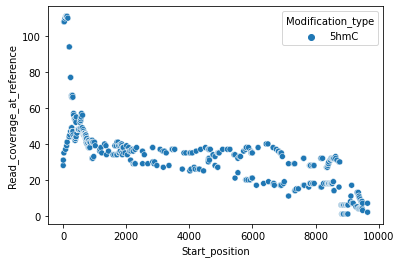

In [227]:
sns.scatterplot(data=table, x='Start_position', y='Read_coverage_at_reference',
hue='Modification_type')


In [ ]:
sns.scatterplot(data=table, x='Start_position', y='Read_coverage_at_reference'
hue="methylation_site_present_absent",)

<AxesSubplot:xlabel='Start_position', ylabel='Percentage_of_mod_bases'>

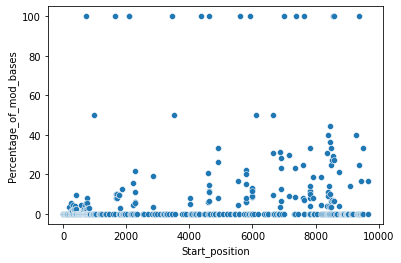

In [ ]:
sns.scatterplot(data=table, x='Start_position', y='Percentage_of_mod_bases')
                )

In [ ]:
mod_position_bases = table.groupby('Start_position')['Percentage_of_mod_bases'].first()/100
mod_position_bases 

Start_position
2       0.0000
6       0.0000
23      0.0000
24      0.0000
37      0.0000
         ...  
9476    0.0000
9491    0.0000
9492    0.3333
9648    0.1667
9649    0.0000
Name: Percentage_of_mod_bases, Length: 472, dtype: float64

Text(0, 0.5, 'sum(%mod_bases)')

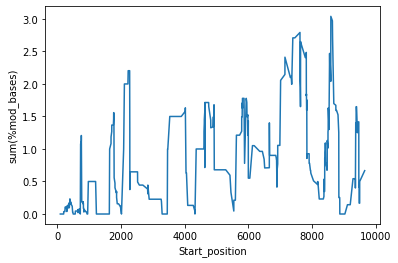

In [ ]:
ax = mod_position_bases.rolling(10).sum().plot()
ax.set_ylabel('sum(%mod_bases)')

Text(0, 0.5, 'sum(%mod_bases)')

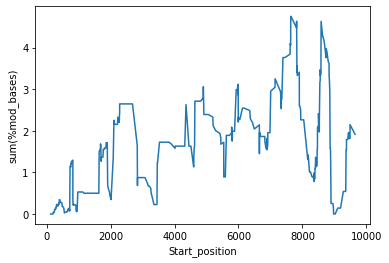

In [ ]:
ax = mod_position_bases.rolling(20).sum().plot()
ax.set_ylabel('sum(%mod_bases)')

Text(0, 0.5, 'sum(%mod_bases)')

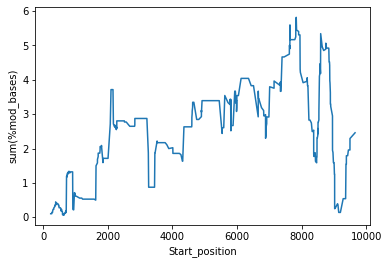

In [ ]:
ax = mod_position_bases.rolling(30).sum().plot()
ax.set_ylabel('sum(%mod_bases)')

Text(0, 0.5, 'sum(%mod_bases)')

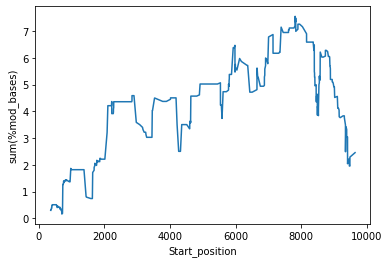

In [ ]:
ax = mod_position_bases.rolling(50).sum().plot()
ax.set_ylabel('sum(%mod_bases)')

Text(0, 0.5, 'sum(%mod_bases)')

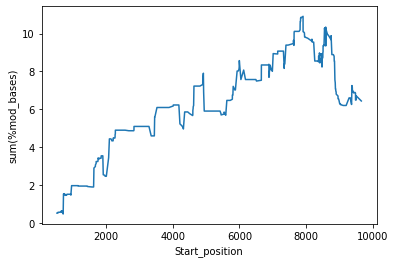

In [ ]:
ax = mod_position_bases.rolling(75).sum().plot()
ax.set_ylabel('sum(%mod_bases)')

Text(0, 0.5, 'sum(%mod_bases)')

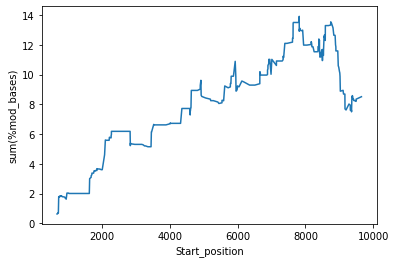

In [ ]:
ax = mod_position_bases.rolling(100).sum().plot()
ax.set_ylabel('sum(%mod_bases)')

In [ ]:
mod_score_bases = table.groupby('Start_position')['Score'].first()/100
mod_score_bases 

Start_position
2        0.35
6        0.32
23       8.61
24      10.00
37       0.09
        ...  
9476     5.00
9491     8.57
9492    10.00
9648     8.57
9649    10.00
Name: Score, Length: 472, dtype: float64

Text(0, 0.5, 'sum_score)')

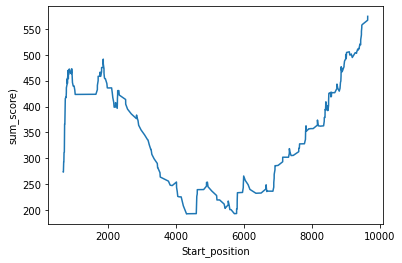

In [ ]:
ax = mod_score_bases.rolling(100).sum().plot()
ax.set_ylabel('sum_score)')

In [ ]:
is_score = table['Score']>500
is_score 

0      False
1      False
2       True
3       True
4      False
       ...  
467    False
468     True
469     True
470     True
471     True
Name: Score, Length: 472, dtype: bool

In [ ]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Bio import SeqIO

max_sequence_id = None
max_gc_content = 0
for seq_record in SeqIO.parse("hxb2f-grna-labeled.gb", "gb"):
    sequence = str(seq_record.seq) # convert sequence to string
    sequence_id = seq_record.id
    gc_content = (sequence.count("C") + sequence.count("G")) / len(sequence) * 100
    if gc_content > max_gc_content:
        max_sequence_id = sequence_id
        max_gc_content = gc_content

print(max_sequence_id)
print(max_gc_content)

.
42.673389586334636


In [ ]:
def get_reference():
  return next(SeqIO.parse("hxb2f-grna-labeled.gb", "gb")) 

In [ ]:
ref = get_reference()
ref

SeqRecord(seq=Seq('TGGAAGGGCTAATTCACTCCCAACGAAGACAAGATATCCTTGATCTGTGGATCT...GCA'), id='.', name='Exported', description='HIV reference HXB2 with fixed tat, nef, and vpr', dbxrefs=[])

In [ ]:
import pandas as pd


In [ ]:
ref_series = pd.Series(list(str(ref.seq)))

next_ref_series = pd.Series(list(str(ref.seq))[1:]+['*'])


In [ ]:
ref_series_value = ref_series.value_counts()
ref_series_value

A    3409
G    2374
T    2162
C    1773
dtype: int64

In [ ]:
is_GC = (ref_series == 'C') | (ref_series == 'G')
is_GC 


0       False
1        True
2        True
3       False
4       False
        ...  
9713    False
9714    False
9715     True
9716     True
9717    False
Length: 9718, dtype: bool

In [ ]:
is_GC.mean()

0.42673389586334637

Text(0, 0.5, '%GC_content')

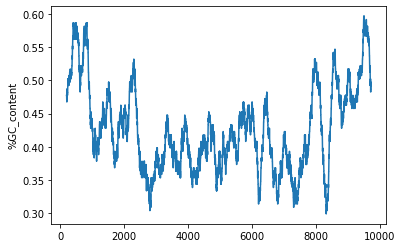

In [ ]:
ax = is_GC.rolling(201).mean().plot()
ax.set_ylabel('%GC_content')

In [ ]:
is_island = (ref_series == 'C') & (next_ref_series == 'G')
is_island |= (ref_series == 'G') & (next_ref_series == 'C')

Text(0.5, 0, 'Start Position')

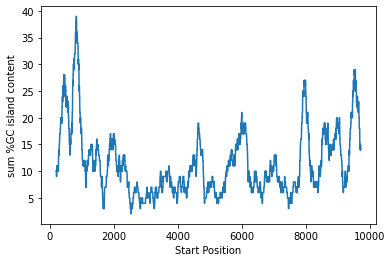

In [ ]:
ax = is_island.rolling(201).sum().plot()
ax.set_ylabel('sum %GC island content')
ax.set_xlabel('Start Position')